# Steps

### Machine Learning Workflow Steps

#### 0. Preprocess the data
#### 1. Perform exploratory data analysis (EDA)
#### 2. Select relevant features
#### 3. Extract input and output columns
#### 4. Scale the values using normalization/standardization
#### 5. Split the data into training and testing sets
#### 6. Train a machine learning model
#### 7. Evaluate the model using metrics and cross-validation
#### 8. Perform model selection and hyperparameter tuning
#### 9. Deploy the trained model for predictions and inference

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
df = pd.read_csv("placement.csv")
df.head()

## Data Preporessing

# Drop the first column of the DataFrame
df = df.iloc[:, 1:]

In [3]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
# This line of code is used to display a concise summary of the DataFrame, including the index dtype and column dtypes, non-nullable counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## EDA

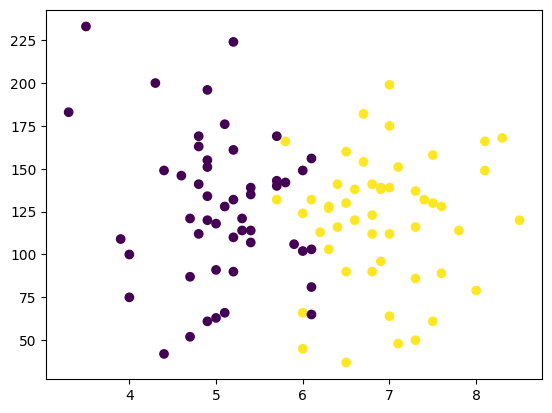

In [5]:
plt.scatter(df['cgpa'] , df['iq'] , c = df['placement']) # This line of code creates a scatter plot where the x-axis represents the 'cgpa' column, the y-axis represents the 'iq' column, and the color of each point is determined by the 'placement' column in the dataframe df.

In [6]:
# Separate independent and dependent variables
# x will hold all the independent variables
x = df.iloc[:, 0:2]  # Selecting columns 0 and 1 as independent variables
# y will hold the dependent variable
y = df.iloc[:, -1]  # Selecting the last column as the dependent variable

In [7]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


## Train Test Split

In [8]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [9]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split # type: ignore

# Split the dataset into training and testing sets with a test size of 10%
# The function returns four arrays: x_train, x_test, y_train, and y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Scale the values

In [10]:
from sklearn.preprocessing import StandardScaler # type: ignore

In [11]:
# This line of code initializes an instance of the StandardScaler class from the sklearn library.
# The StandardScaler is a technique used to standardize features by removing the mean and scaling to unit variance.
# It is often used in machine learning pipelines to ensure that all features are on the same scale, 
# which can improve the performance of some algorithms.
scaler = StandardScaler()

In [12]:
# This line of code scales the training data using the StandardScaler
# The 'fit_transform' method calculates the mean and standard deviation of the data, 
# then scales the data to have a mean of 0 and a standard deviation of 1
X_train = scaler.fit_transform(x_train)

In [13]:
# This line of code applies the transformation learned from the training data to the test data
# The 'transform' method is used to scale/normalize the test data using the same scaling factors as the training data
x_test = scaler.transform(x_test)

# Train the Model

In [14]:
from sklearn.linear_model import LogisticRegression # type: ignore

In [15]:
# Create an instance of the LogisticRegression class, which is a type of supervised learning algorithm used for classification problems.
clf = LogisticRegression()

# Train the model using the training data (X_train) and the corresponding labels (y_train).
# The fit method is used to train the model, and it takes the training data and labels as input.
clf.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Predict the labels of the test data using the trained classifier
y_pred = clf.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score # type: ignore

In [18]:
# Calculate the accuracy of the model by comparing the actual labels (y_test) with the predicted labels (y_pred)
accuracy_score(y_test, y_pred)

1.0

In [19]:
from mlxtend.plotting import plot_decision_regions # type: ignore


<Axes: >

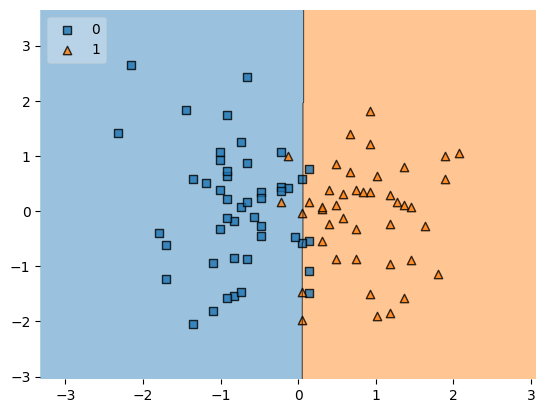

In [20]:
# This line of code is used to plot the decision regions of a classifier.
# It takes in the following parameters:
#   - X_train: The training data features.
#   - y_train.values: The target values for the training data.
#   - clf: The classifier model.
#   - legend: The index of the legend to be plotted.
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [21]:
# This line of code is using the pickle library to serialize the 'clf' object and save it to a file named 'model.pkl'.
# The 'wb' argument stands for 'write binary', indicating that the file should be opened in binary write mode.
# This is necessary because the pickle library serializes objects into a binary format.
import pickle
pickle.dump(clf, open('model.pkl', 'wb')) 